In [132]:
import sys
sys.path.append("../")
import glob
from Linearity import Neuron
import numpy as np
import scipy.stats as ss
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import findfont, FontProperties
# print(plt.style.available)
plt.style.use('seaborn-white')
matplotlib.rcParams['font.family']
print(findfont(FontProperties(family=['sans-serif'])))
import copy

/usr/share/fonts/truetype/msttcorefonts/Arial.ttf


In [62]:
figAspect = 10

In [3]:
n = Neuron.load('/media/sahil/NCBS_Shares_BGStim/patch_data/161013/c1/plots/c1.pkl')

## Coordinate wise comparison

In [152]:
feature = 0 # Area under the curve
expected, observed, g_expected, g_observed = {}, {}, {}, {}
for exp in n:
    for sqr in exp:
        ## Control case
        if(exp[sqr].type == "Control"):
            if sqr > 1:
                expected[sqr], observed[sqr] = zip(*[(exp[sqr].coordwise[coord].expected_feature[feature],exp[sqr].coordwise[coord].average_feature[feature]) for coord in exp[sqr].coordwise])
        ## Gabazine case
        if(exp[sqr].type == "GABAzine"):
            if sqr > 1:
                g_expected[sqr], g_observed[sqr] = zip(*[(exp[sqr].coordwise[coord].expected_feature[feature],exp[sqr].coordwise[coord].average_feature[feature]) for coord in exp[sqr].coordwise])

In [153]:
c_expected, c_observed, c_g_expected, c_g_observed = copy.deepcopy(expected), copy.deepcopy(observed), copy.deepcopy(g_expected), copy.deepcopy(g_observed)

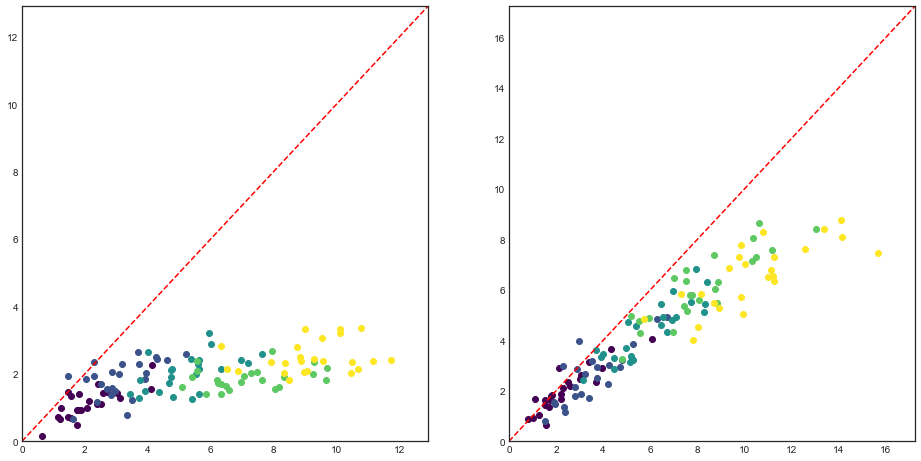

In [154]:
max_exp, max_g_exp = 0.,0.
f, ax = plt.subplots(1,2)
color=iter(matplotlib.cm.viridis(np.linspace(0,1,len((set(observed) and set(g_observed))))))
squareVal = []
for sqr,c in zip(sorted(set(observed) and set(g_observed)), color):
    squareVal.append(ax[0].scatter(expected[sqr], observed[sqr], label=str(sqr), c=c))
    ax[1].scatter(g_expected[sqr], g_observed[sqr], label=str(sqr), c=c)
    max_g_exp = max(max_g_exp, max(g_expected[sqr]))
    max_exp = max(max_exp, max(expected[sqr]))
max_exp *=1.1
max_g_exp *=1.1
ax[0].set_xlim(0,max_exp)
ax[0].set_ylim(0,max_exp)
ax[1].set_xlim(0,max_g_exp)
ax[1].set_ylim(0,max_g_exp)
ax[0].plot((0,max_exp), (0,max_exp), 'r--')
ax[1].plot((0,max_g_exp), (0,max_g_exp), 'r--')
f.set_figwidth(16)
f.set_figheight(8)
plt.show()

## Trial wise comparison

In [155]:
feature = 0 # Area under the curve
expected, observed, g_expected, g_observed = {}, {}, {}, {}
for exp in n:
    for sqr in exp:
        ## Control case
        if(exp[sqr].type == "Control"):
            if sqr > 1:
                expected[sqr] = []
                observed[sqr] = []
                for coord in exp[sqr].coordwise:
                    for trial in exp[sqr].coordwise[coord].trials:
                        expected[sqr].append(exp[sqr].coordwise[coord].expected_feature[feature])
                        observed[sqr].append(trial.feature[feature])
        ## Gabazine case
        if(exp[sqr].type == "GABAzine"):
            if sqr > 1:
                g_expected[sqr] = []
                g_observed[sqr] = []
                for coord in exp[sqr].coordwise:
                    for trial in exp[sqr].coordwise[coord].trials:
                        g_expected[sqr].append(exp[sqr].coordwise[coord].expected_feature[feature])
                        g_observed[sqr].append(trial.feature[feature])

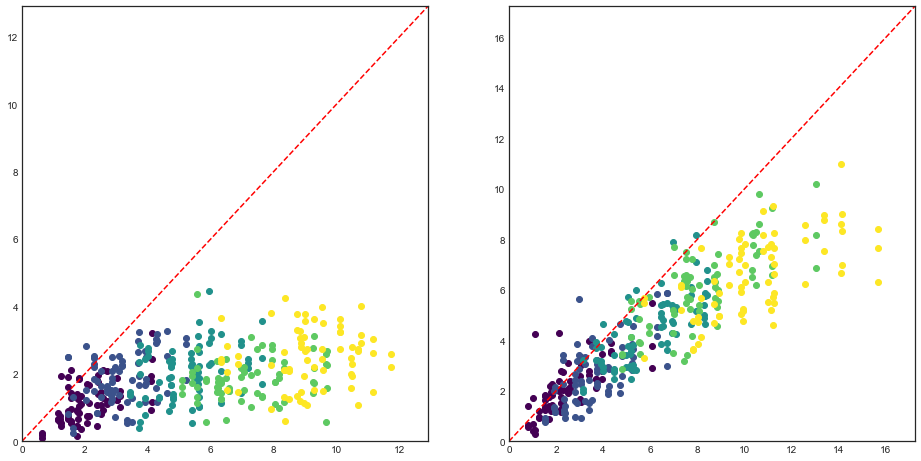

In [191]:
max_exp, max_g_exp = 0.,0.
f, ax = plt.subplots(1,2)
color=iter(matplotlib.cm.viridis(np.linspace(0,1,len((set(observed) and set(g_observed))))))
squareVal = []
for sqr,c in zip(sorted(set(observed) and set(g_observed)), color):
    squareVal.append(ax[0].scatter(expected[sqr], observed[sqr], label=str(sqr), c=c))
    ax[1].scatter(g_expected[sqr], g_observed[sqr], label=str(sqr), c=c)
    max_g_exp = max(max_g_exp, max(g_expected[sqr]))
    max_exp = max(max_exp, max(expected[sqr]))
max_exp *=1.1
max_g_exp *=1.1
ax[0].set_xlim(0,max_exp)
ax[0].set_ylim(0,max_exp)
ax[1].set_xlim(0,max_g_exp)
ax[1].set_ylim(0,max_g_exp)
ax[0].plot((0,max_exp), (0,max_exp), 'r--')
ax[1].plot((0,max_g_exp), (0,max_g_exp), 'r--')
f.set_figwidth(16)
f.set_figheight(8)
plt.show()

## Coord and trials together overplotted: kind of pointless

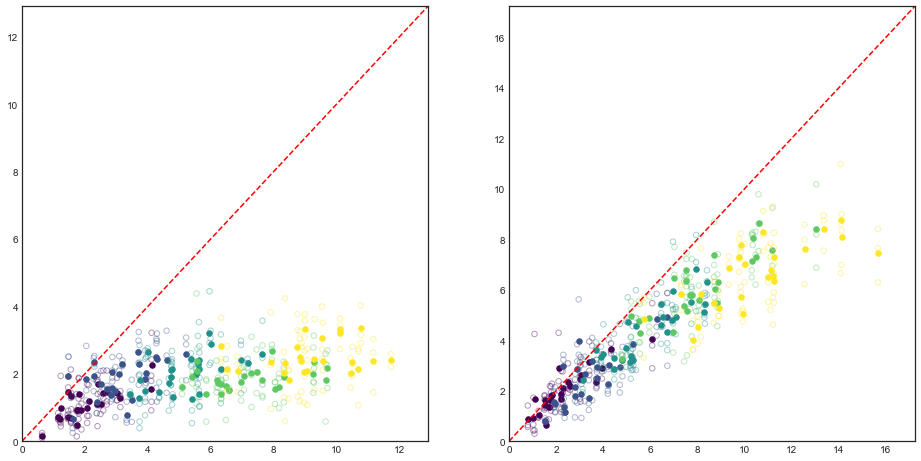

In [193]:

max_exp, max_g_exp = 0.,0.
f, ax = plt.subplots(1,2)
color=iter(matplotlib.cm.viridis(np.linspace(0,1,len((set(observed) and set(g_observed))))))
squareVal = []
markersize = 30
for sqr,c in zip(sorted(set(observed) and set(g_observed)), color):
    ax[0].scatter(expected[sqr], observed[sqr], label=str(sqr), alpha=0.4, facecolors='none', edgecolors=c, s=markersize)
    ax[0].scatter(c_expected[sqr], c_observed[sqr], label=str(sqr), c=c, alpha=1., s=markersize)
    ax[1].scatter(g_expected[sqr], g_observed[sqr], label=str(sqr), alpha=0.4, facecolors='none', edgecolors=c, s=markersize)
    ax[1].scatter(c_g_expected[sqr], c_g_observed[sqr], label=str(sqr), c=c, alpha=1., s=markersize)
    max_g_exp = max(max_g_exp, max(g_expected[sqr]))
    max_exp = max(max_exp, max(expected[sqr]))

max_exp *=1.1
max_g_exp *=1.1
ax[0].set_xlim(0,max_exp)
ax[0].set_ylim(0,max_exp)
ax[1].set_xlim(0,max_g_exp)
ax[1].set_ylim(0,max_g_exp)
ax[0].plot((0,max_exp), (0,max_exp), 'r--')
ax[1].plot((0,max_g_exp), (0,max_g_exp), 'r--')
f.set_figwidth(16)
f.set_figheight(8)
plt.show()